<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">IMPORTING LIBRARIES</h1>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

%matplotlib inline


<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">DATA ANALYSIS</h1>
<br>

In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20,1.0,265000.00,1.9,130.0,1,0,4.0,1
1,55.0,0.0,7861.0,0.0,38,0.0,263358.03,1.1,136.0,1,0,6.0,1
2,65.0,0.0,146.0,0.0,20,0.0,162000.00,1.3,129.0,1,1,7.0,1
3,50.0,1.0,981.0,0.0,20,0.0,NaN,1.9,140.0,1,0,7.0,1
4,50.0,1.0,111.0,0.0,20,0.0,210000.00,1.9,137.0,1,0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,55.0,0.0,1820.0,0.0,38,0.0,270000.00,1.2,139.0,0,0,271.0,0
309,42.0,1.0,1688.0,1.0,35,0.0,279000.00,0.9,NaN,1,1,250.0,0
310,45.0,0.0,2060.0,1.0,60,0.0,NaN,0.8,138.0,0,0,278.0,0
311,45.0,0.0,NaN,0.0,38,0.0,140000.00,1.4,140.0,1,1,280.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       313 non-null    float64
 1   anaemia                   311 non-null    float64
 2   creatinine_phosphokinase  309 non-null    float64
 3   diabetes                  311 non-null    float64
 4   ejection_fraction         313 non-null    int64  
 5   high_blood_pressure       312 non-null    float64
 6   platelets                 308 non-null    float64
 7   serum_creatinine          310 non-null    float64
 8   serum_sodium              311 non-null    float64
 9   gender                    313 non-null    int64  
 10  smoking                   313 non-null    int64  
 11  time                      310 non-null    float64
 12  DEATH_EVENT               313 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 31.9 KB


<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">DATA VISUALIZATION</h1>
<br>

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

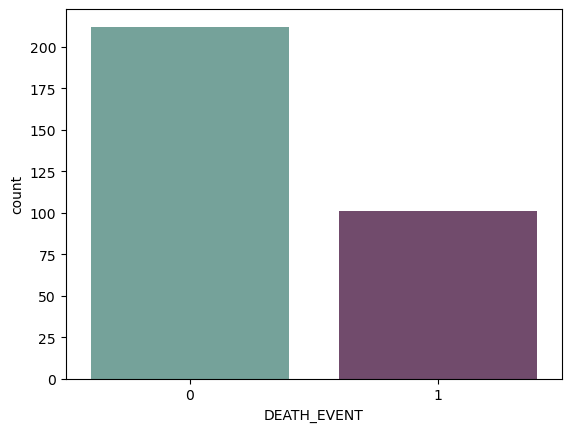

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

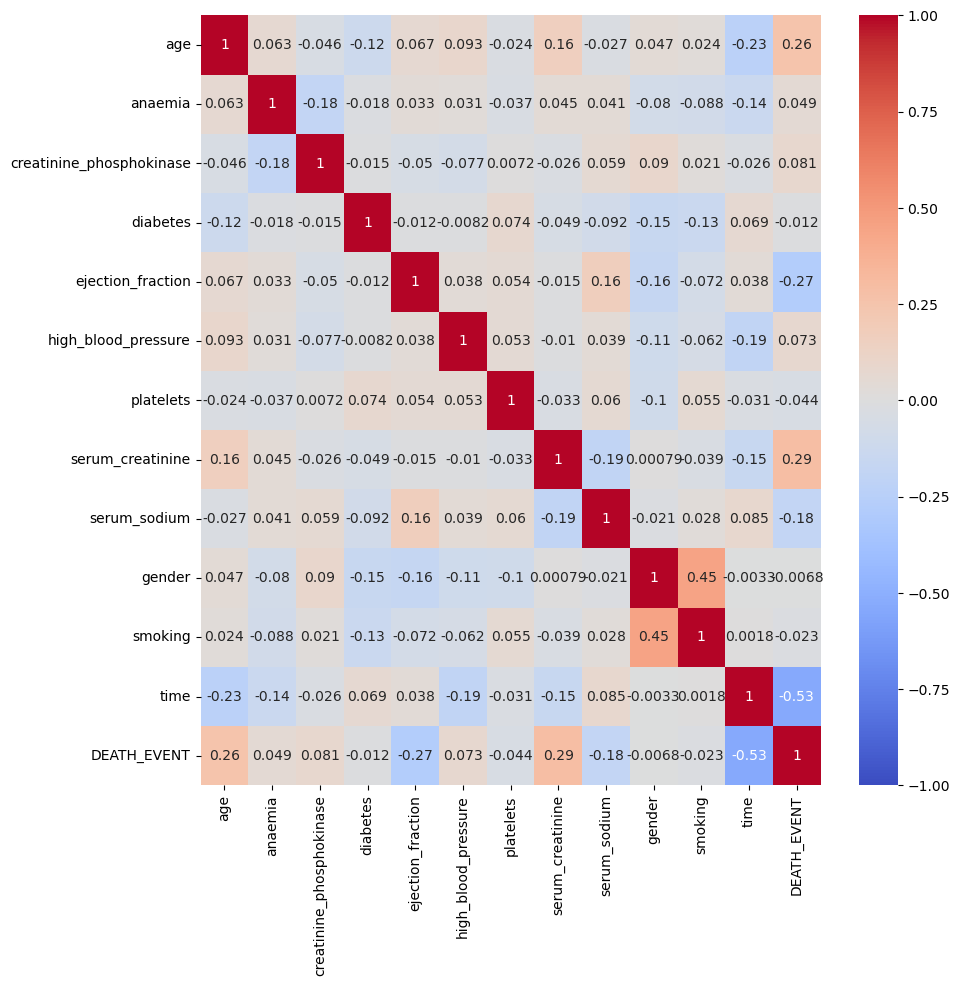

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True);

<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">DATA MODEL</h1>
<br>

<br><br>
<h2 style="margin: 0px; padding: 0px; ">Data Cleaning: <h2>

In [6]:
data = data.dropna()
data = data.drop_duplicates()
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [7]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names) 

X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.22,random_state=7)  
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,7.027674e-17,1.001688,-1.761996,-0.839391,-0.084532,0.754200,2.851030
anaemia,297.0,1.981206e-16,1.001688,-0.876275,-0.876275,-0.876275,1.141195,1.141195
creatinine_phosphokinase,297.0,5.495043e-17,1.001688,-0.561144,-0.470053,-0.336388,-0.007671,7.199356
diabetes,297.0,-5.906237e-17,1.001688,-0.840771,-0.840771,-0.840771,1.189384,1.189384
ejection_fraction,297.0,1.409273e-16,1.001688,-2.036213,-0.676448,0.003434,0.598331,3.572815
high_blood_pressure,297.0,7.476249e-16,1.001688,-0.739510,-0.739510,-0.739510,1.352247,1.352247
platelets,297.0,-2.519496e-16,1.001688,-2.540316,-0.508091,-0.005118,0.433645,6.287394
serum_creatinine,297.0,2.364364e-17,1.001688,-0.863825,-0.477692,-0.284626,0.004973,7.727619
serum_sodium,297.0,2.574540e-15,1.001688,-5.346742,-0.592304,0.086902,0.766107,2.577322
gender,297.0,-1.166295e-16,1.001688,-1.362266,-1.362266,0.734071,0.734071,0.734071


<br><br>
<h2 style="margin: 0px; padding: 0px; ">Support Vector Classifier: <h2>

In [8]:
svc_clf = SVC(probability=True)
svc_clf.fit(X_train, y_train)
svc_clf_pred = svc_clf.predict(X_test)
svc_clf_acc = accuracy_score(y_test, svc_clf_pred) * 100

<AxesSubplot:>

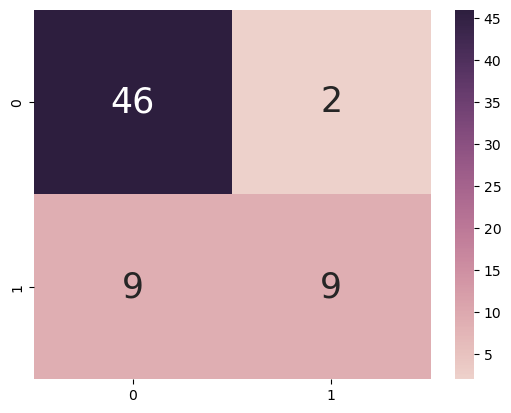

In [9]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, svc_clf_pred), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws = {'size':25})

<br><br>
<h2 style="margin: 0px; padding: 0px">Random Forest Classifier: <h2>

In [26]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred) * 100

<AxesSubplot:>

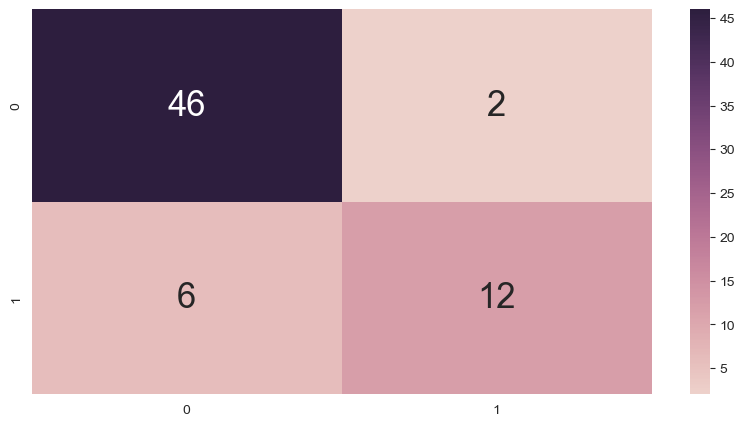

In [27]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws = {'size':25})

<br><br>
<h2 style="margin: 0px; padding: 0px">Logistic Regression: <h2>

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred) * 100

<AxesSubplot:>

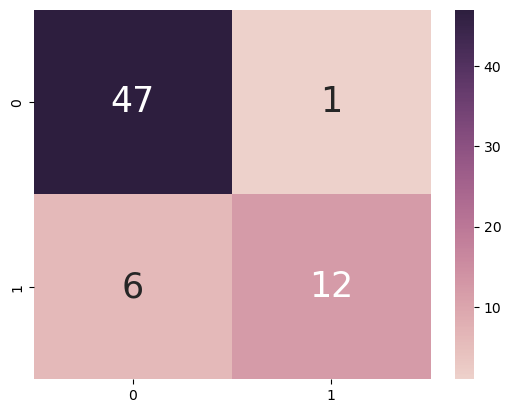

In [13]:
cm = confusion_matrix(y_test, log_reg_pred)
sns.heatmap(cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws = {'size':25})

<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">PREDICTING OUTPUT</h1>
<br>

In [28]:
arr = np.array([
                [75,0,582.0,0,20.0,1,265000,1.9,130,1,0,4],
               [55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271],
                [60,1,47,0,20,0,204000,0.7,139,1,1,73],
               [50.0,0.0,196.0,0.0,45,0.0,395000.00,1.6,136.0,1,1,285.0]
])

#age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction,
#high_blood_pressure, platelets, serum_creatinine, serum_sodium, gender, smoking, time

#	65.0	1	160	1	20	0	327000.00	2.7	116	0	0	8  Fatal = True
# 65.0	0.0	146.0	0.0	20	0.0	162000.00	1.3	129.0	1	1	7.0 Fatal = True
# 50.0	0.0	196.0	0.0	45	0.0	395000.00	1.6	136.0	1	1	285.0  Fatal = False

X_new= s_scaler.fit_transform(arr)
X_new = pd.DataFrame(X_new, columns=col_names)

In [29]:
y_pred = svc_clf.predict_proba(X_new)
prob_svc = y_pred[3]
y_pred = rf.predict_proba(X_new)
prob_kn = y_pred[3]
y_pred = log_reg.predict_proba(X_new)
prob_lreg = y_pred[3]


print("\nUsing Support Vector Classifier:")
print("\nProbability of a Heart Failure is %0.4f"% (prob_svc[1] * 100),"%\n\n===================================")

print("\nUsing Random Forest Classifier:")
print("\nProbability of a Heart Failure is %0.4f"% (prob_kn[1] * 100),"%\n\n===================================")

print("\nUsing Logistic Regression:")
print("\nProbability of a Heart Failure is %0.4f"% (prob_lreg[1] * 100),"%\n\n")


Using Support Vector Classifier:

Probability of a Heart Failure is 4.8287 %


Using Random Forest Classifier:

Probability of a Heart Failure is 35.2910 %


Using Logistic Regression:

Probability of a Heart Failure is 1.3371 %




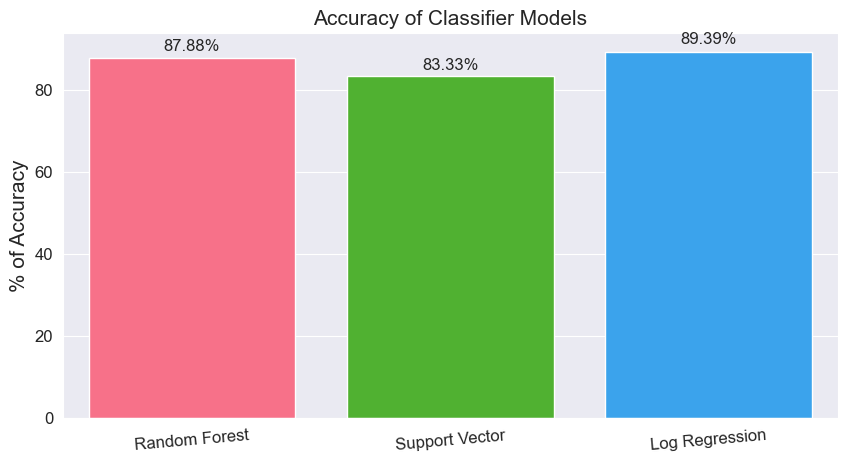

In [30]:
plt.rcParams['figure.figsize']=10,5
sns.set_style('darkgrid')
ax = sns.barplot(x=[ "Random Forest", "Support Vector", "Log Regression"], y=[ rf_acc, svc_clf_acc, log_reg_acc], palette = "husl", saturation =2.0)
plt.ylabel('% of Accuracy', fontsize = 15)
plt.title('Accuracy of Classifier Models', fontsize = 15)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 5)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'large')
plt.show()

In [17]:
def userInput():
    arr = np.array([
                    [75,0,582.0,0,20.0,1,265000,1.9,130,1,0,4],
                   [55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271],
                    [60,1,47,0,20,0,204000,0.7,139,1,1,73],
                   [45.0,0,2413,0,38,0,270000.00,1.4,140,1,1,280]
    ])

    #age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction,
    #high_blood_pressure, platelets, serum_creatinine, serum_sodium, gender, smoking, time

    #	65.0	1	160	1	20	0	327000.00	2.7	116	0	0	8

    arr[3][0] = float(input("Enter Age: "))
    arr[3][1] = float(input("Does patient have Anaemia: "))
    arr[3][2] = float(input("Enter Creatinine phosphokinase: "))
    arr[3][3] = float(input("Enter Diabetes: "))
    arr[3][4] = float(input("Enter Ejection fraction: "))
    arr[3][5] = float(input("Does patient have high blood pressure? "))
    arr[3][6] = float(input("Enter platelets: "))
    arr[3][7] = float(input("Enter Serum creatinine: "))
    arr[3][8] = float(input("Enter serum_sodium: "))
    arr[3][9] = float(input("Enter Gender: "))
    arr[3][10] = float(input("Enter Smoking status: "))
    arr[3][11] = float(input("Enter Time patient is admitted for: "))
    
    X_new= s_scaler.fit_transform(arr)
    X_new = pd.DataFrame(X_new, columns=col_names)
    
    y_pred = svc_clf.predict_proba(X_new)
    prob_svc = y_pred[3]
    y_pred = rf.predict_proba(X_new)
    prob_kn = y_pred[3]
    print(y_pred)
    y_pred = log_reg.predict_proba(X_new)
    prob_lreg = y_pred[3]


    print("\nUsing Support Vector Classifier:")
    print("\nProbability of a Heart Failure is %0.4f"% (prob_svc[1] * 100),"%\n\n===================================")

    print("\nUsing Random Forest Classifier:")
    print("\nProbability of a Heart Failure is %0.4f"% (prob_kn[1] * 100),"%\n\n===================================")

    print("\nUsing Logistic Regression:")
    print("\nProbability of a Heart Failure is %0.4f"% (prob_lreg[1] * 100),"%\n\n")
    
userInput()

KeyboardInterrupt: Interrupted by user

In [ ]:
    #	65.0	1	160	1	20	0	327000.00	2.7	116	0	0	8